In [1]:
import random
class Environment(object):
    def __init__(self): #constuctor
        self.Location = ["1", "2", "3", "4"]
        self.Move = ["L", "R", "U", "D"]
        self.Path = {"1R" : "2", "1L" : "W", "1U" : "W", "1D" : "3",
                     "2R" : "W", "2L" : "1", "2U" : "W", "2D" : "4",
                     "3R" : "4", "3L" : "W", "3U" : "1", "4D" : "W",
                     "4R" : "W", "4L" : "3", "4U" : "2", "3D" : "W",
                    }
        self.Journey = []
class Agent(Environment):
    def __init__(self, Environment):
        self.AgentLocation = random.choice(Environment.Location)
        print("Agent Location: ", self.AgentLocation)
        Environment.Journey.append(self.AgentLocation[0])
        
        while (self.AgentLocation[0] != "4"):
            ToMove = self.ChoosePath(self.AgentLocation, Environment)
            self.AgentLocation = Environment.Path[ToMove]
            Environment.Journey.append(self.AgentLocation[0])
        
        Environment.Journey.append("4")
        print("Journey: ", Environment.Journey)
        
    def ChoosePath(self, AgentLocation, Environment):
        i = random.choice(Environment.Move) #pick up down left or right
        j = str(AgentLocation[0] + i) #creates key of suggested path
        print("Suggested path: ", j)
        
        while (Environment.Path[j] == "W"): #if the path has landed into a wall
            i = random.choice(Environment.Move) #pick up down left or right
            j = str(AgentLocation[0] + i) #creates key of suggested path
            print("Suggested path: ", j)
            
        print("Selected path: ", j)
        return j
    
E1 = Environment()
A1 = Agent(E1)

Agent Location:  1
Suggested path:  1U
Suggested path:  1R
Selected path:  1R
Suggested path:  2L
Selected path:  2L
Suggested path:  1U
Suggested path:  1D
Selected path:  1D
Suggested path:  3R
Selected path:  3R
Journey:  ['1', '2', '1', '3', '4', '4']


In [2]:
#depth first search finding agent
class Environment(object):
    #def __init__(self):
    myGraph = {"1": set(["2","3"]),
               "2": set(["1","4"]),
               "3": set(["1","4"]),
               "4": set(["2","3"])
              }
    state = "2"
    goal = "4"
class Agent(Environment):
    def dfs(self, graph, start, goal):
        stack = [(start,[start])]
        P = []
        while stack:
            (vertex, path) = stack.pop()
            print("Vertex and path: ", vertex, path)
            print("stack: ", stack)
            for next in graph [vertex] - set(path):
                if next == goal:
                    P.append(path+[next])
                else:
                    stack.append((next, path+[next]))
                    print("stack 2 : ", stack)
        return P
    
    def __init__(self, Environment):
        print("DFS: ", self.dfs(Environment.myGraph, Environment.state, Environment.goal))
        
theEnvironment = Environment()
theAgent = Agent(theEnvironment)

Vertex and path:  2 ['2']
stack:  []
stack 2 :  [('1', ['2', '1'])]
Vertex and path:  1 ['2', '1']
stack:  []
stack 2 :  [('3', ['2', '1', '3'])]
Vertex and path:  3 ['2', '1', '3']
stack:  []
DFS:  [['2', '4'], ['2', '1', '3', '4']]


In [3]:
#dfs and bfs search finding agent
#!/usr/bin/env python
# coding: utf-8

# ![image.png](attachment:image.png)

# In[25]:


#depth first search finding agent
class Environment(object):
    #def __init__(self):
    MyGraph = {"1": set(["2", "4"]),
               "2": set(["1", "3", "5"]),
               "3": set(["2", "6"]),
               "4": set(["1", "5", "7"]),
               "5": set(["2", "4", "6", "8"]),
               "6": set(["3", "5", "9"]),
               "7": set(["4", "8"]),
               "8": set(["5", "7", "9"]),
               "9": set(["6", "8"]),}
    Cost = {str(["1", "2"]) : "3", str(["1", "4"]) : "5",
            str(["2", "1"]) : "3", str(["2", "3"]) : "5", str(["2", "5"]) : "7",
            str(["3", "2"]) : "5", str(["3", "6"]) : "9",
            str(["4", "1"]) : "5", str(["4", "5"]) : "9", str(["4", "7"]) : "11",
            str(["5", "2"]) : "7", str(["5", "4"]) : "9", str(["5", "6"]) : "11", str(["5", "8"]) : "13",
            str(["6", "3"]) : "9", str(["6", "5"]) : "11", str(["6", "9"]) : "15",
            str(["7", "4"]) : "11", str(["7", "8"]) : "15",
            str(["8", "5"]) : "13", str(["8", "7"]) : "15", str(["8", "9"]) : "17",
            str(["9", "6"]) : "15", str(["9", "8"]) : "17",
           }
    State = "1"
    TheGoal = "9"
        
class Agent(Environment):
    def dfs(self, graph, start, goal): 
        stack = [(start, [start])] 
        p = [] 
        while stack: 
            (vertex, path) = stack.pop() 
            for next in graph[vertex] - set(path): 
                if next == goal: 
                    p.append(path + [next]) 
                else:
                    stack.append((next, path + [next]))      
        return p
    
    def bfs(self, graph, start, goal): 
        stack = [(start, [start])] 
        p = [] 
        while stack: 
            (vertex, path) = stack.pop(0) 
            for next in graph[vertex] - set(path): 
                if next == goal: 
                    p.append(path + [next])
                    return p
                else:
                    stack.append((next, path + [next]))
        return p
    
    def __init__(self, Environment):
        print("Depth First Search: ", self.dfs(Environment.MyGraph, Environment.State, Environment.TheGoal))
        print("Breadth First Search: ", self.bfs(Environment.MyGraph, Environment.State, Environment.TheGoal))
        
TheEnvironment = Environment()
TheAgent = Agent(TheEnvironment)

Depth First Search:  [['1', '2', '5', '8', '9'], ['1', '2', '5', '4', '7', '8', '9'], ['1', '2', '5', '6', '9'], ['1', '2', '3', '6', '9'], ['1', '2', '3', '6', '5', '8', '9'], ['1', '2', '3', '6', '5', '4', '7', '8', '9'], ['1', '4', '7', '8', '9'], ['1', '4', '7', '8', '5', '2', '3', '6', '9'], ['1', '4', '7', '8', '5', '6', '9'], ['1', '4', '5', '2', '3', '6', '9'], ['1', '4', '5', '8', '9'], ['1', '4', '5', '6', '9']]
Breadth First Search:  [['1', '4', '5', '6', '9']]


In [10]:
#Uniform Cost Search
#dfs and bfs search finding agent
#!/usr/bin/env python
# coding: utf-8

# ![image.png](attachment:image.png)

# In[25]:


#depth first search finding agent
class Environment(object):
    #def __init__(self):
    MyGraph = {"1": set(["2", "4"]),
               "2": set(["1", "3", "5"]),
               "3": set(["2", "6"]),
               "4": set(["1", "5", "7"]),
               "5": set(["2", "4", "6", "8"]),
               "6": set(["3", "5", "9"]),
               "7": set(["4", "8"]),
               "8": set(["5", "7", "9"]),
               "9": set(["6", "8"]),}
    Cost = {str(["1", "2"]) : "3", str(["1", "4"]) : "5",
            str(["2", "1"]) : "3", str(["2", "3"]) : "5", str(["2", "5"]) : "7",
            str(["3", "2"]) : "5", str(["3", "6"]) : "9",
            str(["4", "1"]) : "5", str(["4", "5"]) : "9", str(["4", "7"]) : "11",
            str(["5", "2"]) : "7", str(["5", "4"]) : "9", str(["5", "6"]) : "11", str(["5", "8"]) : "13",
            str(["6", "3"]) : "9", str(["6", "5"]) : "11", str(["6", "9"]) : "15",
            str(["7", "4"]) : "11", str(["7", "8"]) : "15",
            str(["8", "5"]) : "13", str(["8", "7"]) : "15", str(["8", "9"]) : "17",
            str(["9", "6"]) : "15", str(["9", "8"]) : "17",
           }
    State = "1"
    TheGoal = "9"
        
class Agent(Environment):
    def dfs(self, graph, start, goal): 
        stack = [(start, [start])] 
        p = [] 
        while stack: 
            (vertex, path) = stack.pop() 
            for next in graph[vertex] - set(path): 
                if next == goal: 
                    p.append(path + [next]) 
                else:
                    stack.append((next, path + [next]))      
        return p
    
    def bfs(self, graph, start, goal): 
        stack = [(start, [start])] 
        p = [] 
        while stack: 
            (vertex, path) = stack.pop(0) 
            for next in graph[vertex] - set(path): 
                if next == goal: 
                    p.append(path + [next])
                    return p
                else:
                    stack.append((next, path + [next]))
        return p
    
    def getCost(path_to_cost):
        i = 0
        pathCost = 0
        while i<len(path_to_cost) - 1:
            l = []
            l.append(path_to_cost[i])
            l.append(path_to_cost[i + 1])
            pathCost = pathCost + int(Environment.Cost[str(l)])
            i = i + 1
            
        return pathCost
        
    
    def UCS(self, graph, start, goal):
        stack = [(start, [start])] 
        p = []
        c = []
        leastCost = 1000
        while stack: 
            (vertex, path) = stack.pop() 
            for next in graph[vertex] - set(path): 
                if next == goal: 
                    pathCost = Agent.getCost(path + [next])
                    print("Path: ", path+[next], "Path Cost: ", pathCost)
                    if pathCost < leastCost:
                        leastCost = pathCost
                        p = path + [next]
                else:
                    stack.append((next, path + [next]))      
        return p

    
    def __init__(self, Environment):
        print("Depth First Search: ", self.dfs(Environment.MyGraph, Environment.State, Environment.TheGoal))
        print("Breadth First Search: ", self.bfs(Environment.MyGraph, Environment.State, Environment.TheGoal))
        print("Uniform Cost Search: ", self.UCS(Environment.MyGraph, Environment.State, Environment.TheGoal))
        
TheEnvironment = Environment()
TheAgent = Agent(TheEnvironment)

Depth First Search:  [['1', '2', '5', '8', '9'], ['1', '2', '5', '6', '9'], ['1', '2', '5', '4', '7', '8', '9'], ['1', '2', '3', '6', '9'], ['1', '2', '3', '6', '5', '8', '9'], ['1', '2', '3', '6', '5', '4', '7', '8', '9'], ['1', '4', '7', '8', '9'], ['1', '4', '7', '8', '5', '2', '3', '6', '9'], ['1', '4', '7', '8', '5', '6', '9'], ['1', '4', '5', '8', '9'], ['1', '4', '5', '2', '3', '6', '9'], ['1', '4', '5', '6', '9']]
Breadth First Search:  [['1', '4', '5', '6', '9']]
Path:  ['1', '2', '5', '8', '9'] Path Cost:  40
Path:  ['1', '2', '5', '6', '9'] Path Cost:  36
Path:  ['1', '2', '5', '4', '7', '8', '9'] Path Cost:  62
Path:  ['1', '2', '3', '6', '9'] Path Cost:  32
Path:  ['1', '2', '3', '6', '5', '8', '9'] Path Cost:  58
Path:  ['1', '2', '3', '6', '5', '4', '7', '8', '9'] Path Cost:  80
Path:  ['1', '4', '7', '8', '9'] Path Cost:  48
Path:  ['1', '4', '7', '8', '5', '2', '3', '6', '9'] Path Cost:  80
Path:  ['1', '4', '7', '8', '5', '6', '9'] Path Cost:  70
Path:  ['1', '4', '5'

#Class Exercise: dfs, bfs, ucs
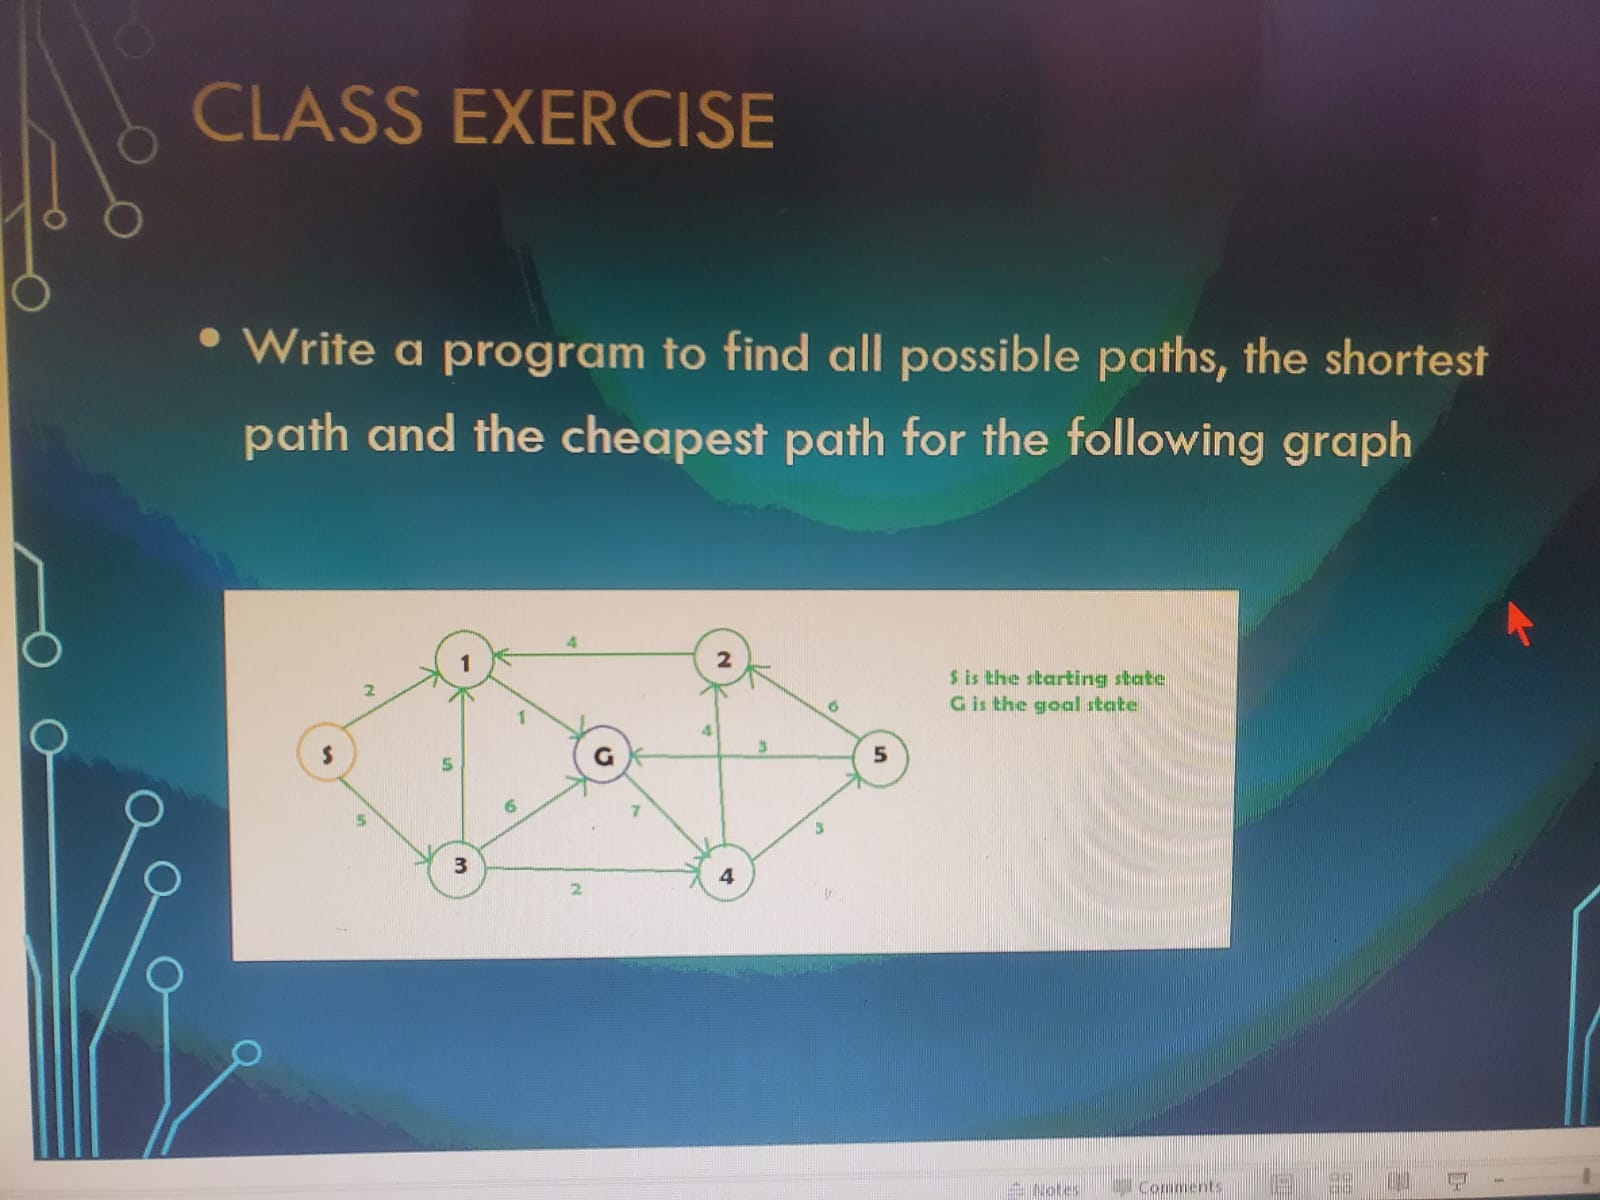


In [ ]:
#class dfs, bfs and ucs

class Environment(object):
    myGraph = {"1": set(["S", "2", "3", "G"]),
               "2": set(["1", "5", "4"]),
               "3": set(["S", "4", "G", "1"]),
               "4": set(["3", "G", "2", "5"]),
               "5": set(["4", "2", "G"]),
               "G": set(["1", "3", "4", "5"]),
               "S": set(["1", "3"])
              }
    
    Cost = {str(["1", "S"]) : "2", str(["1", "2"]) : "4", str(["1","3"]) : "5", str(["1", ""])
        
    }